# Transport

# Programming for DA

In [14]:
!pip install missingno

# IRELAND

## Data Preparation & Visualisation


### Exploratory ireland Analysis


In [1]:
# BASE
import numpy as np
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
import missingno as msno  

# ireland PREPROCESSING
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor 

# MODELING

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_validate,GridSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# MODEL TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

We need to do these things because we don't want to receive warnings.

In [2]:
# WARNINGS
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Download irelandset 

https://ireland.gov.ie/irelandset/tha25-passenger-journeys-by-public-transport

In [46]:
ireland = pd.read_csv("THA25 - Passenger Journeys by Public Transport.csv")

In [47]:
ireland.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.000
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.000
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,NaN
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.000
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.000


In [11]:
ireland.tail()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
1019,THA25C01,Passenger Journeys,2023W43,2023 Week 43,40,"All public transport, excluding LUAS",Number,5366554.000
1020,THA25C01,Passenger Journeys,2023W44,2023 Week 44,10,Dublin Metro Bus,Number,3043578.000
1021,THA25C01,Passenger Journeys,2023W44,2023 Week 44,20,"Bus, excluding Dublin Metro",Number,811636.000
1022,THA25C01,Passenger Journeys,2023W44,2023 Week 44,30,Rail,Number,824979.000
1023,THA25C01,Passenger Journeys,2023W44,2023 Week 44,40,"All public transport, excluding LUAS",Number,4680193.000


Check for Duplication

In [12]:
ireland.nunique()

STATISTIC              1
Statistic Label        1
TLIST(W1)            256
Week                 256
C03935V04687           4
Mode of Transport      4
UNIT                   1
VALUE                959
dtype: int64

Check information in ireland

In [13]:
ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          1024 non-null   object 
 1   Statistic Label    1024 non-null   object 
 2   TLIST(W1)          1024 non-null   object 
 3   Week               1024 non-null   object 
 4   C03935V04687       1024 non-null   int64  
 5   Mode of Transport  1024 non-null   object 
 6   UNIT               1024 non-null   object 
 7   VALUE              960 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 64.1+ KB


Missing Values Calculation

In [14]:
ireland.isnull().sum()

STATISTIC             0
Statistic Label       0
TLIST(W1)             0
Week                  0
C03935V04687          0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

The below code helps to calculate the percentage of missing values in each column

In [15]:
(ireland.isnull().sum()/(len(ireland)))*100

STATISTIC           0.000
Statistic Label     0.000
TLIST(W1)           0.000
Week                0.000
C03935V04687        0.000
Mode of Transport   0.000
UNIT                0.000
VALUE               6.250
dtype: float64

Data Cleanning

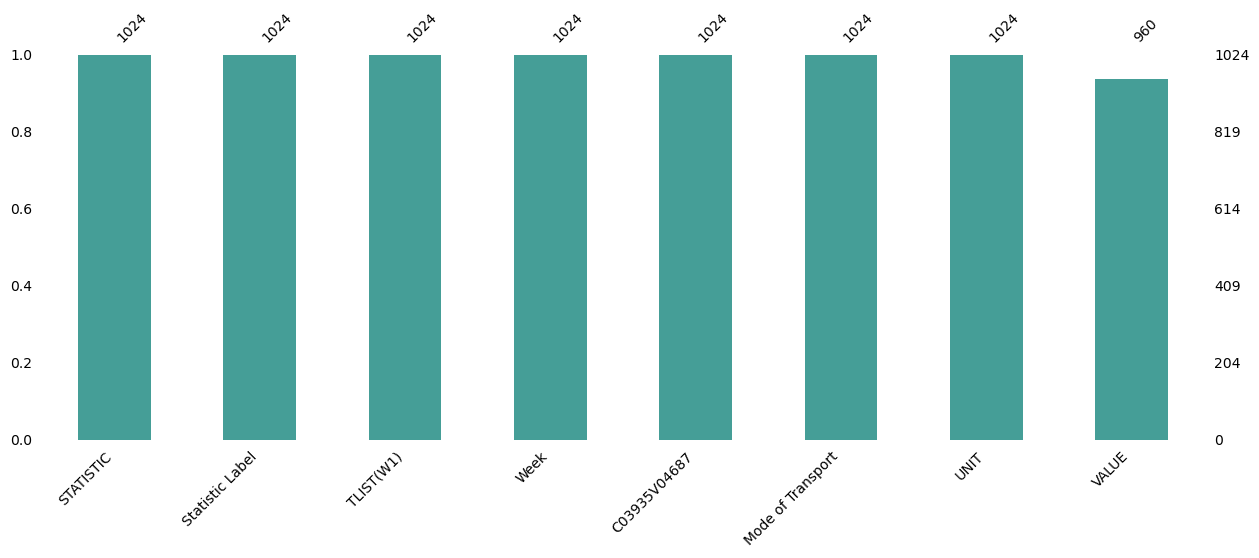

In [16]:
msno.bar(ireland,figsize=(15, 5),fontsize=10,color = '#459E97');

In [48]:
# Fill empty values with average value of column
mean_value = ireland['VALUE'].mean()
ireland['VALUE'].fillna(mean_value, inplace=True)

In [49]:
ireland.isnull().sum()

STATISTIC            0
Statistic Label      0
TLIST(W1)            0
Week                 0
C03935V04687         0
Mode of Transport    0
UNIT                 0
VALUE                0
dtype: int64

checking missing values

In [19]:
missing = ireland.isnull().sum()
missing = missing[missing > 0]
missing

Series([], dtype: int64)

to analyze the functional way for information dataset 

In [20]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [21]:
check_df(ireland)

##################### Shape #####################
(1024, 8)
##################### Types #####################
STATISTIC             object
Statistic Label       object
TLIST(W1)             object
Week                  object
C03935V04687           int64
Mode of Transport     object
UNIT                  object
VALUE                float64
dtype: object
##################### Head #####################
  STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0  THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1  THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2  THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
3  THA25C01  Passenger Journeys   2019W01  2019 Week 01            40   
4  THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   

                      Mode of Transport    UNIT       VALUE  
0                      Dublin Metro Bus  Number 1987891.000  
1           Bus, excluding Dubli

## Data Visualization

Bar Chart

In [32]:
ireland.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.000
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.000
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,1740811.637
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.000
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.000


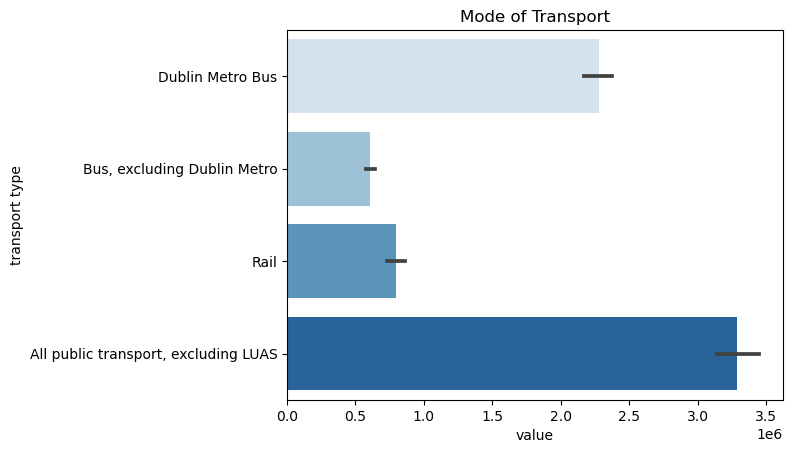

In [34]:
#Creating bar plot
sns.barplot(x = 'VALUE',y = 'Mode of Transport',data = ireland,palette = "Blues")
#Adding the aesthetics
plt.title('Mode of Transport')
plt.xlabel('value')
plt.ylabel('transport type') 
# Show the plot
plt.show()

Line Chart

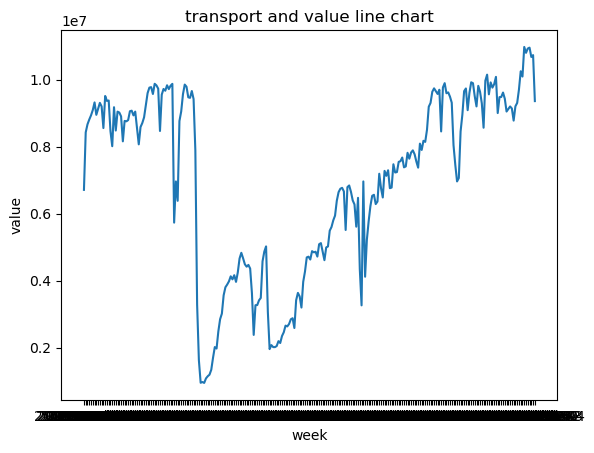

In [43]:
ireland=ireland.groupby('Week')['VALUE'].sum().to_frame().reset_index()
#Creating the line chart
plt.plot(ireland['Week'], ireland['VALUE']) 
#Adding the aesthetics
plt.title('transport and value line chart')
plt.xlabel('week')
plt.ylabel('value') 
#Show the plot
plt.show()


Scatter Plot

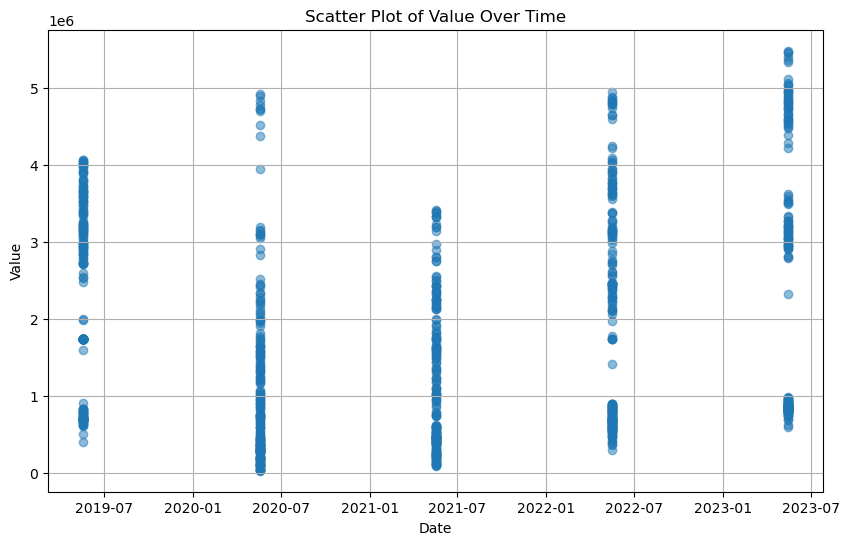

In [67]:
# Assuming df is your DataFrame with the provided dataset
# If 'date' is not already in datetime format, convert it
ireland['Week'] = pd.to_datetime(ireland['Week'])

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ireland['Week'], ireland['VALUE'], alpha=0.5)
plt.title('Scatter Plot of Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Box Plot

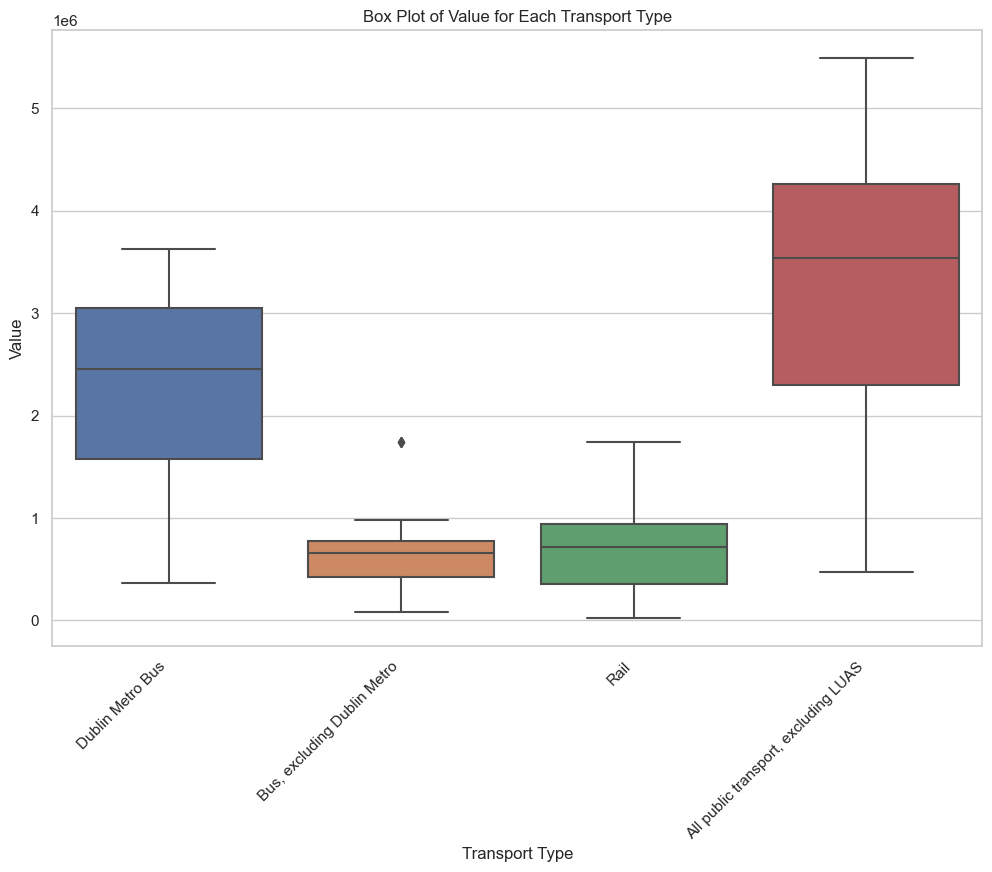

In [68]:
# Set the seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plot box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Mode of Transport', y='VALUE', data=ireland)
plt.title('Box Plot of Value for Each Transport Type')
plt.xlabel('Transport Type')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

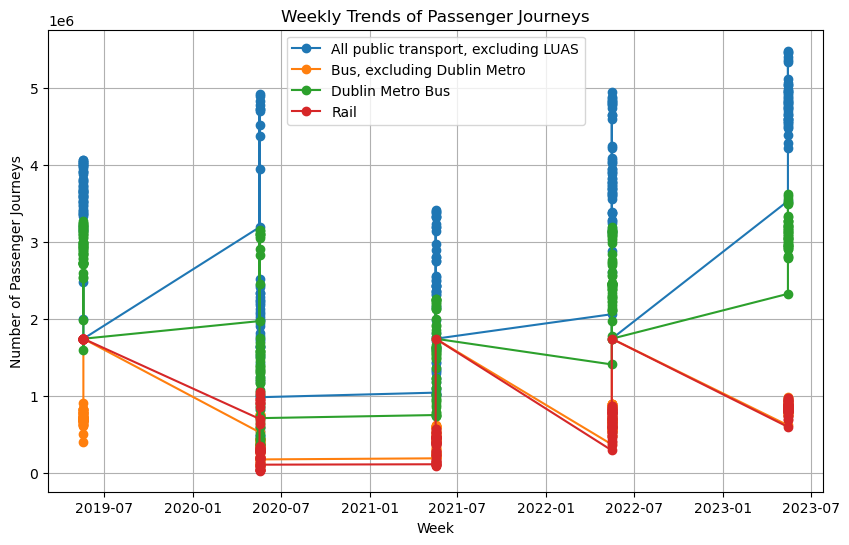

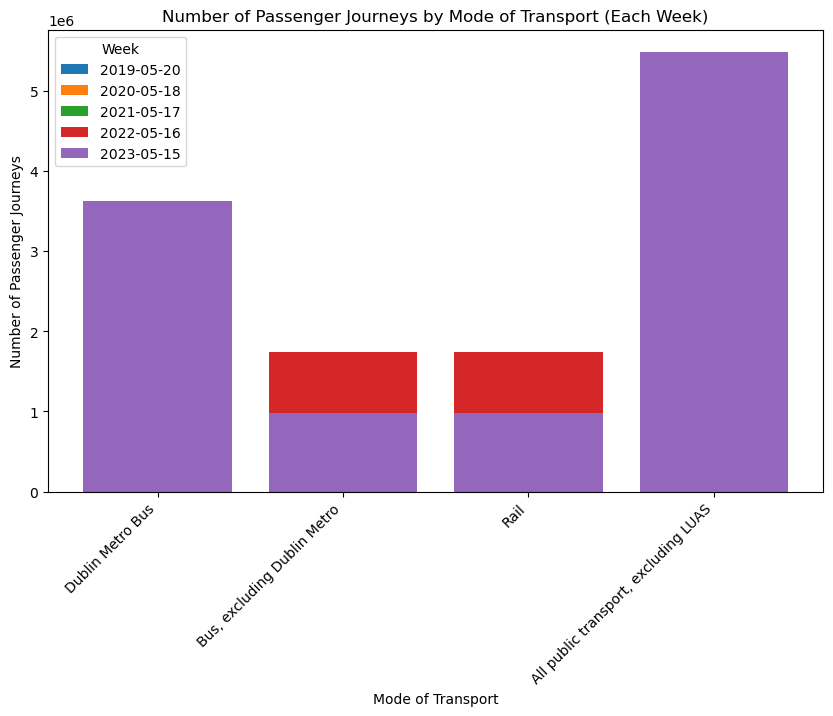

In [64]:
# Extract year and week number from the 'Week' column
ireland['Year'] = ireland['Week'].str.extract('(\d{4})')
ireland['Week_Num'] = ireland['Week'].str.extract('(\d{2})')

# Convert 'Week' column to datetime
ireland['Week'] = pd.to_datetime(ireland['Year'] + ireland['Week_Num'] + '-1', format='%Y%U-%w')

# Drop the intermediate columns used for extraction
ireland = ireland.drop(['Year', 'Week_Num'], axis=1)

# Line chart for weekly trends
plt.figure(figsize=(10, 6))
for transport_mode, group in ireland.groupby('Mode of Transport'):
    plt.plot(group['Week'], group['VALUE'], label=transport_mode, marker='o')

plt.title('Weekly Trends of Passenger Journeys')
plt.xlabel('Week')
plt.ylabel('Number of Passenger Journeys')
plt.legend()
plt.grid(True)
plt.show()

# Bar chart for each week
plt.figure(figsize=(10, 6))
for week, group in ireland.groupby('Week'):
    plt.bar(group['Mode of Transport'], group['VALUE'], label=str(week.date()))

plt.title('Number of Passenger Journeys by Mode of Transport (Each Week)')
plt.xlabel('Mode of Transport')
plt.ylabel('Number of Passenger Journeys')
plt.legend(title='Week')
plt.xticks(rotation=45, ha='right')
plt.show()

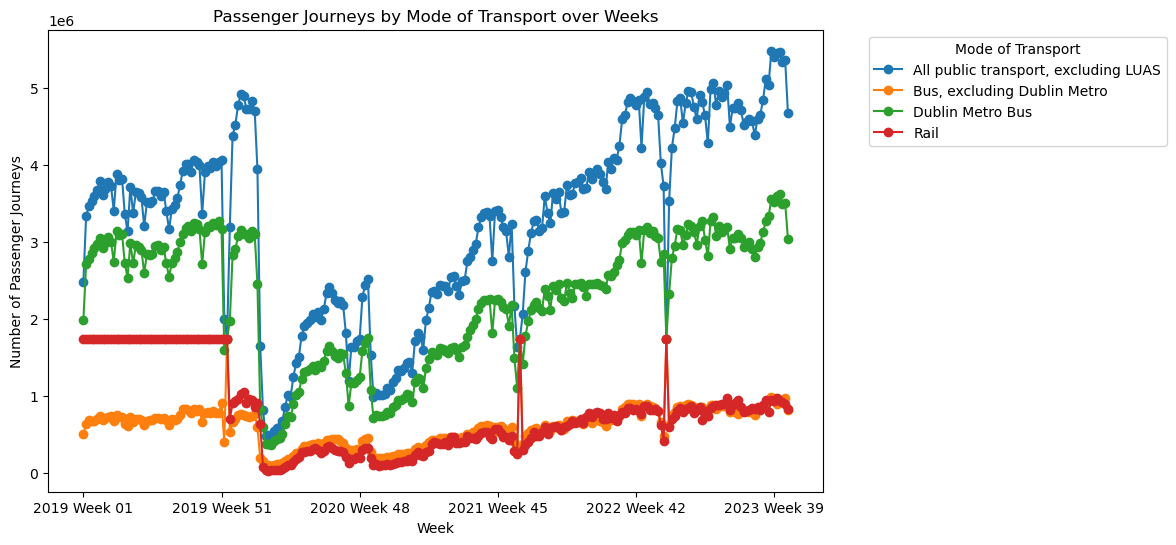

In [22]:
# Pivot the DataFrame to have 'Mode of Transport' as columns and 'Week' as index
pivot_df = ireland.pivot(index='Week', columns='Mode of Transport', values='VALUE')

# Plotting a line chart for each mode of transport
pivot_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Passenger Journeys by Mode of Transport over Weeks')
plt.xlabel('Week')
plt.ylabel('Number of Passenger Journeys')
plt.legend(title='Mode of Transport', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Interactive Dashboard

file name : interactive_dashboard.py 

## Statistics for Data Analytics

In [69]:
ireland.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019-05-20,10,Dublin Metro Bus,Number,1987891.000
1,THA25C01,Passenger Journeys,2019W01,2019-05-20,20,"Bus, excluding Dublin Metro",Number,497598.000
2,THA25C01,Passenger Journeys,2019W01,2019-05-20,30,Rail,Number,1740811.637
3,THA25C01,Passenger Journeys,2019W01,2019-05-20,40,"All public transport, excluding LUAS",Number,2485489.000
4,THA25C01,Passenger Journeys,2019W02,2019-05-20,10,Dublin Metro Bus,Number,2709579.000


Descriptive Statistics

In [70]:
ireland.describe()

,Week,C03935V04687,VALUE
count,1024,1024.000,1024.000
mean,2021-04-21 09:45:00,25.000,1740811.637
min,2019-05-20 00:00:00,10.000,23231.000
25%,2020-05-18 00:00:00,17.500,649473.500
50%,2021-05-17 00:00:00,25.000,1211672.500
75%,2022-05-16 00:00:00,32.500,2907823.500
max,2023-05-15 00:00:00,40.000,5488658.000
std,NaN,11.186,1378243.049


Summary Statistics

In [71]:
# Assuming your data is in a DataFrame named 'df'
summary_stats = ireland['VALUE'].describe()
print(summary_stats)

count      1024.000
mean    1740811.637
std     1378243.049
min       23231.000
25%      649473.500
50%     1211672.500
75%     2907823.500
max     5488658.000
Name: VALUE, dtype: float64


Grouped Statistics

In [72]:
grouped_stats = ireland.groupby('Mode of Transport')['VALUE'].describe()
grouped_stats


,count,mean,std,min,25%,50%,75%,max
Mode of Transport,,,,,,,,
"All public transport, excluding LUAS",256.000,3284421.957,1276745.294,475208.000,2302270.000,3533714.000,4259835.250,5488658.000
"Bus, excluding Dublin Metro",256.000,605783.230,256747.119,85598.000,425602.750,654970.000,777699.250,1740811.637
Dublin Metro Bus,256.000,2278676.886,859231.116,361266.000,1574492.500,2455738.000,3046376.250,3629045.000
Rail,256.000,794364.477,557817.661,23231.000,354919.750,721418.500,940407.250,1740811.637


Time Series Plot

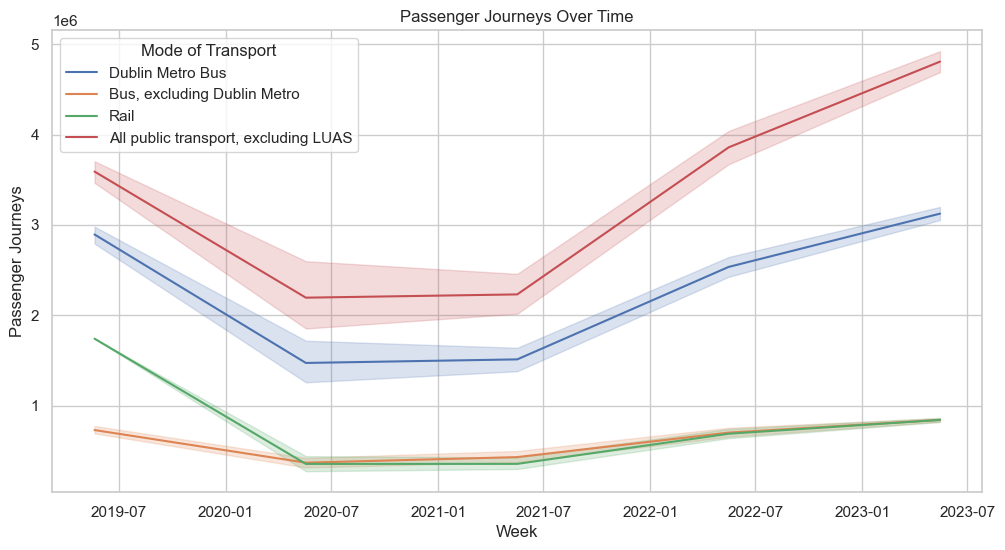

In [73]:
# Convert the date column to datetime
ireland['Week'] = pd.to_datetime(ireland['Week'])

# Plot time series data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='VALUE', hue='Mode of Transport', data=ireland)
plt.title('Passenger Journeys Over Time')
plt.xlabel('Week')
plt.ylabel('Passenger Journeys')
plt.show()

Boxplot

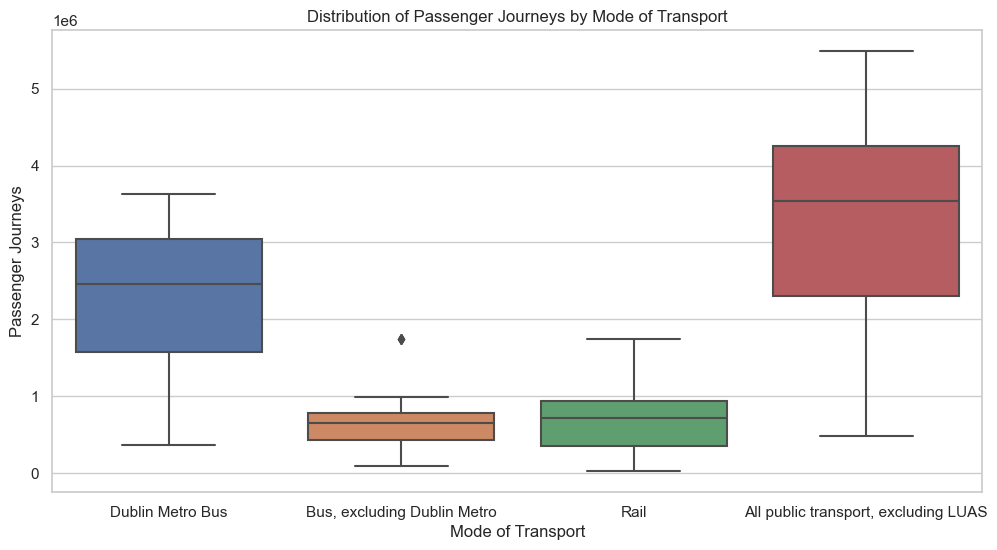

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mode of Transport', y='VALUE', data=ireland)
plt.title('Distribution of Passenger Journeys by Mode of Transport')
plt.xlabel('Mode of Transport')
plt.ylabel('Passenger Journeys')
plt.show()

Bar Chart

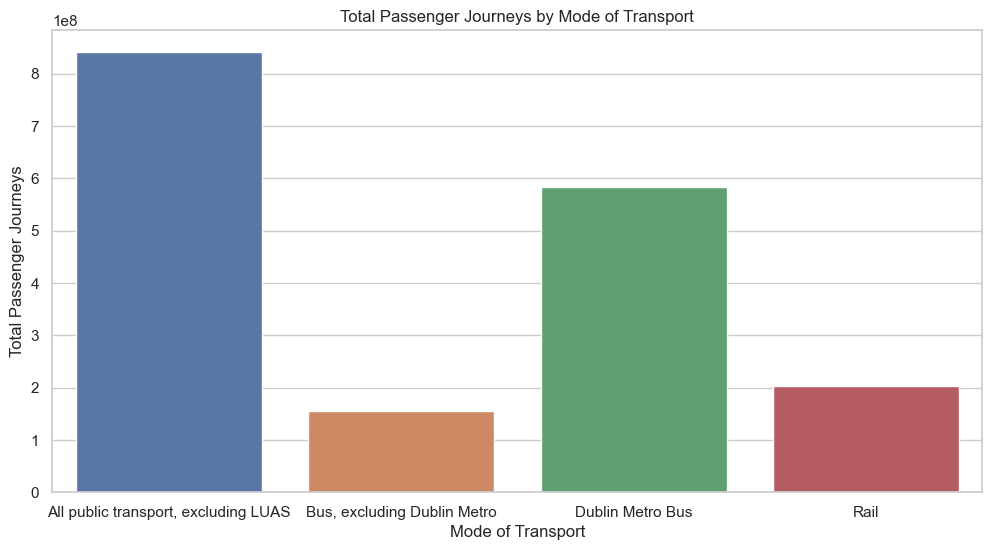

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Mode of Transport', y='VALUE', data=ireland.groupby('Mode of Transport')['VALUE'].sum().reset_index())
plt.title('Total Passenger Journeys by Mode of Transport')
plt.xlabel('Mode of Transport')
plt.ylabel('Total Passenger Journeys')
plt.show()

Assumptions

* We assume that the dataset is a representative sample of the population of interest.
* Here's how you can calculate a confidence interval for the population proportion of users traveling to Dublin by train:

In [76]:
import scipy.stats as stats

In [77]:
# Extract data for users traveling to Dublin by train
train_data = ireland[ireland['Mode of Transport'] == 'Rail']['VALUE']

# Calculate the sample proportion
sample_proportion = train_data.sum() / ireland['VALUE'].sum()

# Calculate the standard error of the proportion
standard_error = stats.sem(train_data)

# Set the confidence level (e.g., 95% confidence interval)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * standard_error

# Calculate the confidence interval
confidence_interval = (sample_proportion - margin_of_error, sample_proportion + margin_of_error)

# Print the results
print(f"Sample Proportion: {sample_proportion:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")
print(f"Confidence Interval: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")

Sample Proportion: 0.1141
Margin of Error: 68331.4078
Confidence Interval: (-68331.2938, 68331.5219)


T - Test

In [92]:
ireland.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.000
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.000
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,1740811.637
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.000
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.000


Independent Samples T-test

In [93]:
from scipy.stats import ttest_ind

In [94]:
# Extract data for the two groups
group1 = ireland[ireland['TLIST(W1)'] == '2019W01']['VALUE']
group2 = ireland[ireland['TLIST(W1)'] == '2019W02']['VALUE']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-statistic: -0.5900339838532538
P-value: 0.5766979231254905
Fail to reject the null hypothesis


Analysis of Variance

In [95]:
from scipy.stats import f_oneway

In [96]:
# Extract data for different modes of transport
groups = [ireland[ireland['C03935V04687'] == mode]['VALUE'] for mode in ireland['C03935V04687'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)

# Output the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


F-statistic: 603.7449123466563
P-value: 1.5423664657357113e-225
Reject the null hypothesis


Wilcoxon Test

In [97]:
from scipy.stats import wilcoxon

In [98]:
# Extract data for "Dublin Metro Bus" in different weeks
week1_values = ireland[(ireland['C03935V04687'] == 10) & (ireland['TLIST(W1)'] == '2019W01')]['VALUE']
week2_values = ireland[(ireland['C03935V04687'] == 10) & (ireland['TLIST(W1)'] == '2019W02')]['VALUE']

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(week1_values, week2_values)

# Output the results
print(f'Wilcoxon Statistic: {statistic}')
print(f'P-value: {p_value}')

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Wilcoxon Statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis


Chi-squared Test

In [99]:
from scipy.stats import chi2_contingency

In [100]:
# Create a contingency table
contingency_table = pd.crosstab(ireland['Mode of Transport'], ireland['Week'])

# Perform chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f'Chi-squared Statistic: {chi2_stat}')
print(f'P-value: {p_value}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (There is a significant association)")
else:
    print("Fail to reject the null hypothesis (There is no significant association)")

Chi-squared Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 765
Expected Frequencies:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Fail to reject the null hypothesis (There is no significant association)


Among Test

One-way ANOVA

In [ ]:
from scipy.stats import f_oneway

In [101]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ireland['VALUE'][ireland['C03935V04687'] == 10],
                                 ireland['VALUE'][ireland['C03935V04687'] == 20],
                                 ireland['VALUE'][ireland['C03935V04687'] == 30],
                                 ireland['VALUE'][ireland['C03935V04687'] == 40])

# Output the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

F-statistic: 603.7449123466563
P-value: 1.5423664657357113e-225
Reject the null hypothesis


Kruskal-Wallis Test (Non-parametric alternative)

In [102]:
from scipy.stats import kruskal

In [103]:
# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(ireland['VALUE'][ireland['C03935V04687'] == 10],
                                ireland['VALUE'][ireland['C03935V04687'] == 20],
                                ireland['VALUE'][ireland['C03935V04687'] == 30],
                                ireland['VALUE'][ireland['C03935V04687'] == 40])

# Output the results
print(f'Kruskal-Wallis Statistic: {h_statistic}')
print(f'P-value: {p_value}')

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Kruskal-Wallis Statistic: 656.9163289500116
P-value: 4.6109066558554525e-142
Reject the null hypothesis


## Machine Learning for Data Analysis

In [50]:
ireland.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.000
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.000
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,1740811.637
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.000
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.000


Linear Regression

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
# Extracting relevant features and target variable
features = ireland[['Mode of Transport', 'Week']]
target = ireland['VALUE']

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['Mode of Transport', 'Week'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

print(f'Linear Regression Mean Squared Error: {linear_reg_mse}')
print(f'Linear Regression Mean Absolute Error: {linear_reg_mae}')
print(f'Linear Regression R-squared: {linear_reg_r2}')


Linear Regression Mean Squared Error: 492411260793.37616
Linear Regression Mean Absolute Error: 517608.96828251693
Linear Regression R-squared: 0.7154560796337578


Decision Tree Regression

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
# Extracting relevant features and target variable
features = ireland[['Mode of Transport', 'Week']]
target = ireland['VALUE']

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['Mode of Transport', 'Week'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
decision_tree_predictions = decision_tree_reg.predict(X_test)

decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)

print(f'Decision Tree Regression Mean Squared Error: {decision_tree_mse}')
print(f'Decision Tree Regression Mean Absolute Error: {decision_tree_mae}')
print(f'Decision Tree Regression R-squared: {decision_tree_r2}')


Decision Tree Regression Mean Squared Error: 1739665263550.9084
Decision Tree Regression Mean Absolute Error: 1006364.144390244
Decision Tree Regression R-squared: -0.005279963374887897


Random Forest Regression 

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
# Extracting relevant features and target variable
features = ireland[['Mode of Transport', 'Week']]
target = ireland['VALUE']

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['Mode of Transport', 'Week'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Random Forest Regression
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
random_forest_predictions = random_forest_reg.predict(X_test)

random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

print(f'Random Forest Regression Mean Squared Error: {random_forest_mse}')
print(f'Random Forest Regression Mean Absolute Error: {random_forest_mae}')
print(f'Random Forest Regression R-squared: {random_forest_r2}')

Random Forest Regression Mean Squared Error: 1007566995089.0061
Random Forest Regression Mean Absolute Error: 770014.7059024392
Random Forest Regression R-squared: 0.41776907710775746


Visualization Linear Regression Model & Decision Tree Model & Random Forest Mode

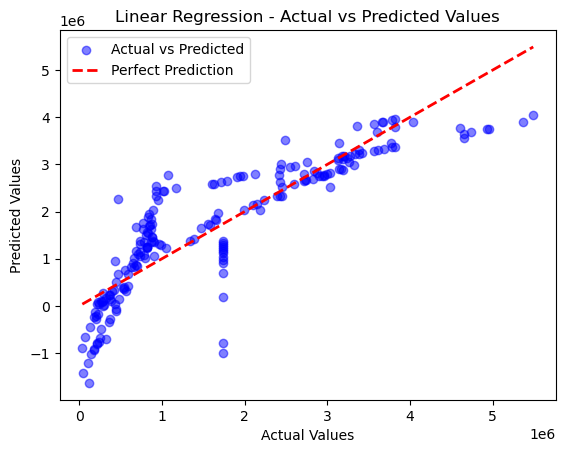

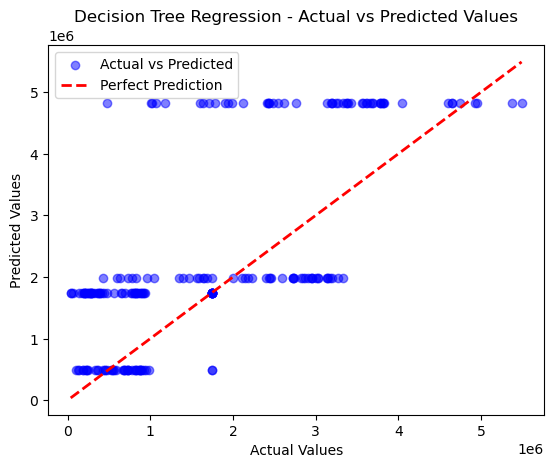

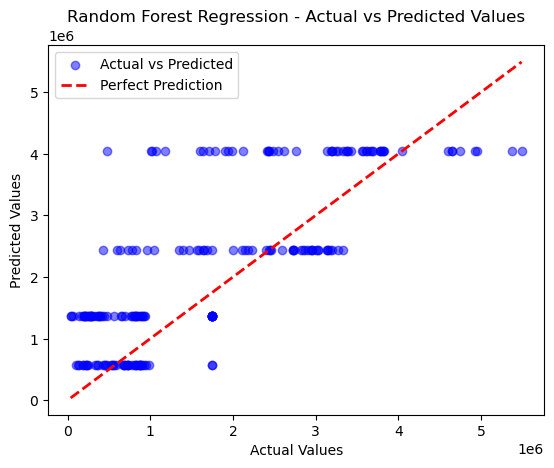

In [65]:
# Function to visualize actual vs predicted values with different colors
def plot_results(actual, predicted, model_name):
    plt.scatter(actual, predicted, alpha=0.5, label='Actual vs Predicted', color='blue')
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs Predicted Values')
    plt.legend()
    plt.show()

# Visualize Linear Regression results
plot_results(y_test, linear_reg_predictions, 'Linear Regression')

# Visualize Decision Tree Regression results
plot_results(y_test, decision_tree_predictions, 'Decision Tree Regression')

# Visualize Random Forest Regression results
plot_results(y_test, random_forest_predictions, 'Random Forest Regression')

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
# Extracting relevant features and target variable
features = ireland[['Week', 'VALUE']]  # Adjust features based on your dataset
target = ireland['Mode of Transport']

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['Week'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Decision Tree Classifier & Random Forest Classifier & Support Vector Classifier & Logistic Regression

In [69]:
# Decision Tree Classifier
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train, y_train)
decision_tree_predictions = decision_tree_clf.predict(X_test)

# Random Forest Classifier
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)
random_forest_predictions = random_forest_clf.predict(X_test)

# Support Vector Machines (SVM)
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_predictions = logistic_reg.predict(X_test)

# Evaluate the models
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)
    
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    print(f'{model_name} Confusion Matrix:\n{confusion_mat}')
    print(f'{model_name} Classification Report:\n{classification_rep}')

# Evaluate Decision Tree Classifier
evaluate_model(decision_tree_predictions, '############# Decision Tree Classifier #############')

# Evaluate Random Forest Classifier
evaluate_model(random_forest_predictions, '############# Random Forest Classifier #############')

# Evaluate SVM
evaluate_model(svm_predictions, '############# Support Vector Machines (SVM) #############')

# Evaluate Logistic Regression
evaluate_model(logistic_reg_predictions, '############# Logistic Regression #############')

############# Decision Tree Classifier ############# Accuracy: 0.5512
############# Decision Tree Classifier ############# Confusion Matrix:
[[30  0 24  0]
 [ 3 27  0 15]
 [11  4 31  2]
 [ 1 32  0 25]]
############# Decision Tree Classifier ############# Classification Report:
                                      precision    recall  f1-score   support

All public transport, excluding LUAS       0.67      0.56      0.61        54
         Bus, excluding Dublin Metro       0.43      0.60      0.50        45
                    Dublin Metro Bus       0.56      0.65      0.60        48
                                Rail       0.60      0.43      0.50        58

                            accuracy                           0.55       205
                           macro avg       0.56      0.56      0.55       205
                        weighted avg       0.57      0.55      0.55       205

############# Random Forest Classifier ############# Accuracy: 0.4439
############# Random Fore

c:\Users\tolga\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tolga\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tolga\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


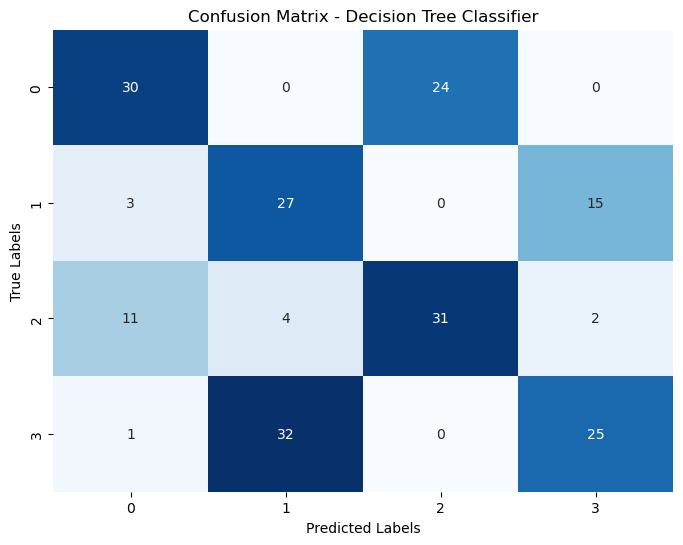

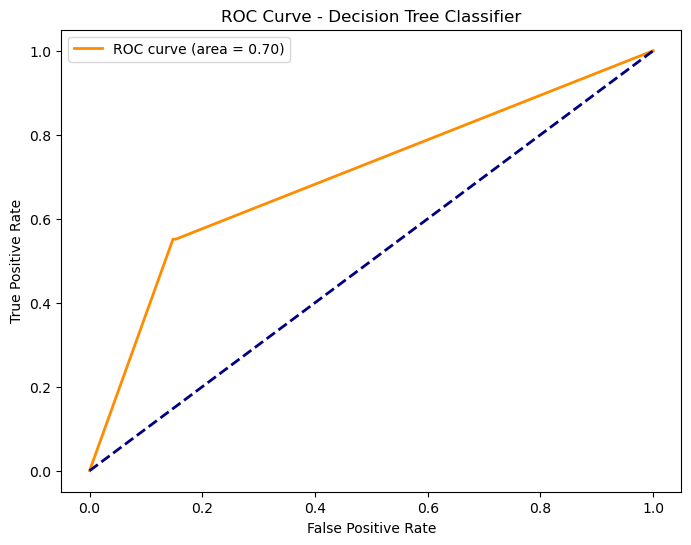

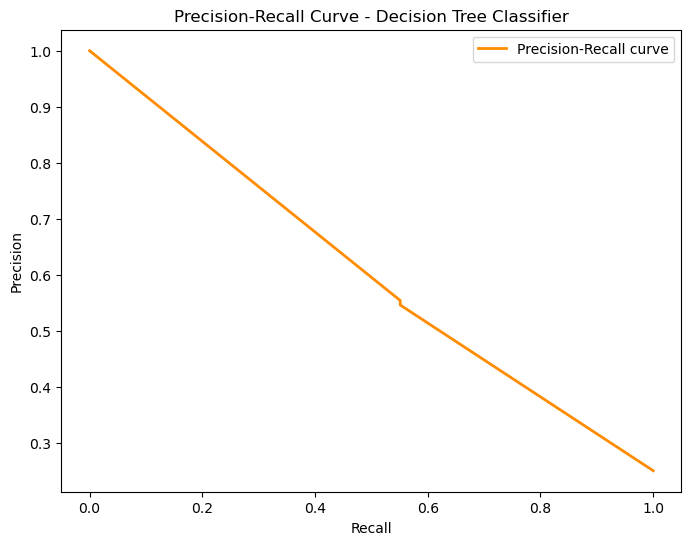

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_test, predictions, model_name):
    y_test_bin = label_binarize(y_test, classes=decision_tree_clf.classes_)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), predictions.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

# Function to plot precision-recall curve
def plot_precision_recall_curve(y_test, predictions, model_name):
    y_test_bin = label_binarize(y_test, classes=decision_tree_clf.classes_)
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), predictions.ravel())

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()

# Plot for Decision Tree Classifier
plot_confusion_matrix(confusion_matrix(y_test, decision_tree_predictions), 'Decision Tree Classifier')
plot_roc_curve(y_test, decision_tree_clf.predict_proba(X_test), 'Decision Tree Classifier')
plot_precision_recall_curve(y_test, decision_tree_clf.predict_proba(X_test), 'Decision Tree Classifier')


# UK

https://assets.publishing.service.gov.uk/media/65788df3254aaa000d050b7e/full_data_clean.csv/preview

Download UK Dataset

In [104]:
en = pd.read_csv("full_data_clean.csv")

## Data Preparation & Visualisation

In [77]:
en.head()

,date,transport_type,value
0,2020-03-01,cars,1.030
1,2020-03-01,light_commercial_vehicles,1.110
2,2020-03-01,heavy_goods_vehicles,1.080
3,2020-03-01,all_motor_vehicles,1.040
4,2020-03-01,tfl_tube,1.030


In [78]:
en.tail()

,date,transport_type,value
13216,2023-12-11,cars,0.970
13217,2023-12-11,light_commercial_vehicles,1.190
13218,2023-12-11,heavy_goods_vehicles,1.050
13219,2023-12-11,all_motor_vehicles,1.010
13220,2023-12-11,bus_excluding_london,0.940


Check for Duplication

In [79]:
en.nunique()

date              1381
transport_type      10
value              235
dtype: int64

Check information in UK

In [80]:
en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13221 entries, 0 to 13220
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            13221 non-null  object 
 1   transport_type  13221 non-null  object 
 2   value           11909 non-null  float64
dtypes: float64(1), object(2)
memory usage: 310.0+ KB


Missing Values Calculation

In [81]:
en.isnull().sum()

date                 0
transport_type       0
value             1312
dtype: int64

The below code helps to calculate the percentage of missing values in each column

In [82]:
(en.isnull().sum()/(len(en)))*100

date             0.000
transport_type   0.000
value            9.924
dtype: float64

Data Cleanning

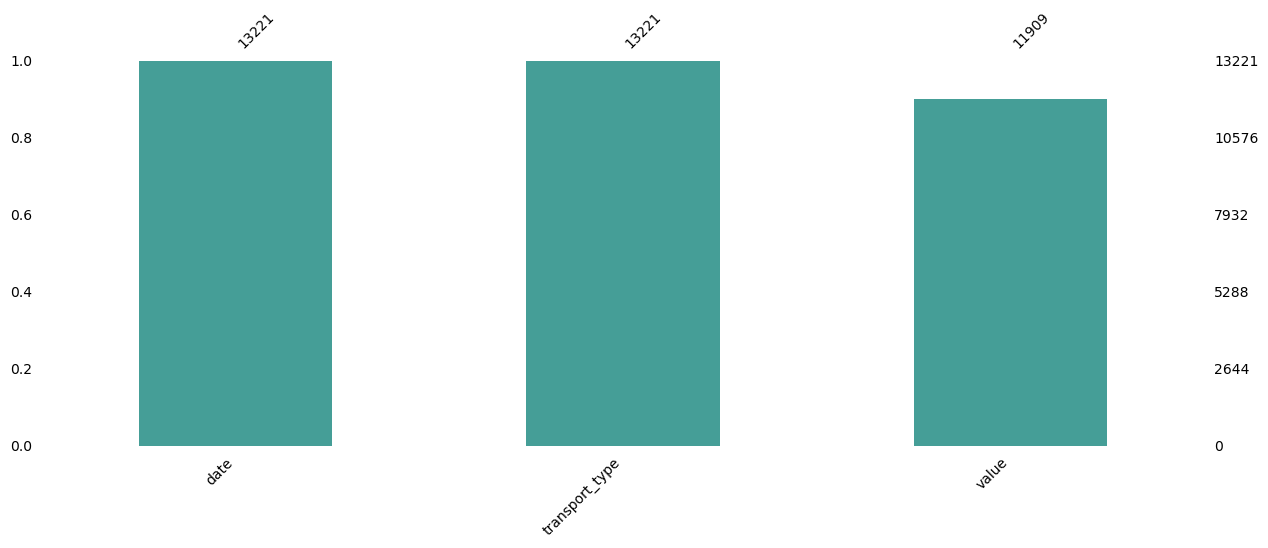

In [83]:
msno.bar(en,figsize=(15, 5),fontsize=10,color = '#459E97');

In [105]:
# Fill empty values with average value of column
mean_value = en['value'].mean()
en['value'].fillna(mean_value, inplace=True)

In [85]:
en.isnull().sum()

date              0
transport_type    0
value             0
dtype: int64

checking missing values

In [86]:
missing = en.isnull().sum()
missing = missing[missing > 0]
missing

Series([], dtype: int64)

to analyze the functional way for information dataset 

In [87]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [88]:
check_df(en)

##################### Shape #####################
(13221, 3)
##################### Types #####################
date               object
transport_type     object
value             float64
dtype: object
##################### Head #####################
         date             transport_type  value
0  2020-03-01                       cars  1.030
1  2020-03-01  light_commercial_vehicles  1.110
2  2020-03-01       heavy_goods_vehicles  1.080
3  2020-03-01         all_motor_vehicles  1.040
4  2020-03-01                   tfl_tube  1.030
##################### Tail #####################
             date             transport_type  value
13216  2023-12-11                       cars  0.970
13217  2023-12-11  light_commercial_vehicles  1.190
13218  2023-12-11       heavy_goods_vehicles  1.050
13219  2023-12-11         all_motor_vehicles  1.010
13220  2023-12-11       bus_excluding_london  0.940
##################### NA #####################
date              0
transport_type    0
value       

## Data Visualization

In [89]:
en.head()

,date,transport_type,value
0,2020-03-01,cars,1.030
1,2020-03-01,light_commercial_vehicles,1.110
2,2020-03-01,heavy_goods_vehicles,1.080
3,2020-03-01,all_motor_vehicles,1.040
4,2020-03-01,tfl_tube,1.030


Bar Chart

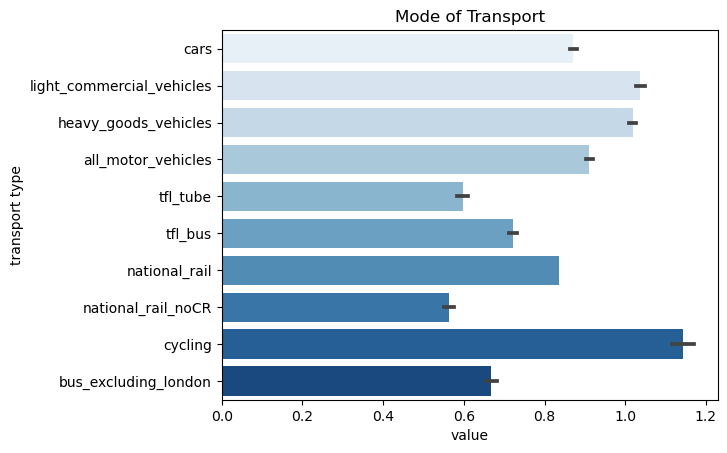

In [95]:
#Creating bar plot
sns.barplot(x = 'value',y = 'transport_type',data = en,palette = "Blues")
#Adding the aesthetics
plt.title('Mode of Transport')
plt.xlabel('value')
plt.ylabel('transport type') 
# Show the plot
plt.show()

Line Chart

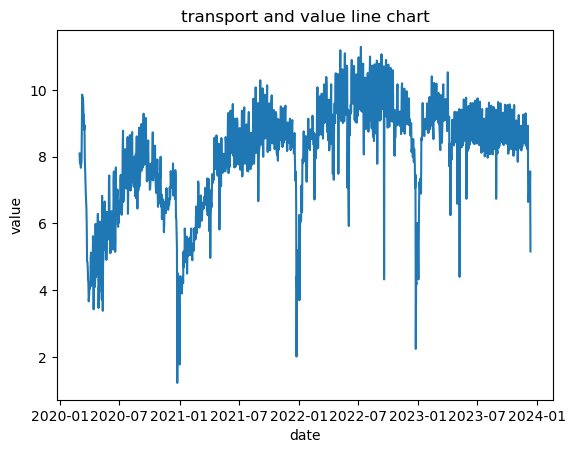

In [96]:
en=en.groupby('date')['value'].sum().to_frame().reset_index()
#Creating the line chart
plt.plot(en['date'], en['value']) 
#Adding the aesthetics
plt.title('transport and value line chart')
plt.xlabel('date')
plt.ylabel('value') 
#Show the plot
plt.show()

Scatter Plot

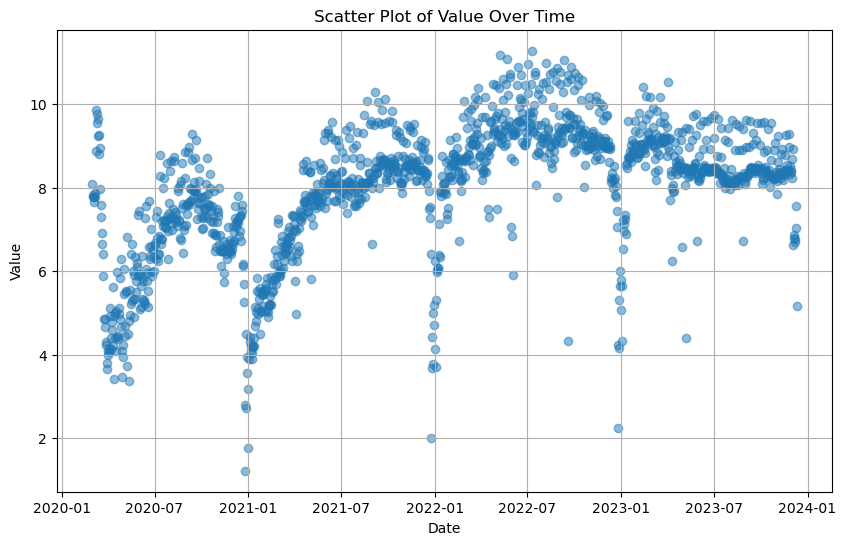

In [97]:
# Assuming df is your DataFrame with the provided dataset
# If 'date' is not already in datetime format, convert it
en['date'] = pd.to_datetime(en['date'])

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(en['date'], en['value'], alpha=0.5)
plt.title('Scatter Plot of Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Box Plot

In [106]:
en.head()

,date,transport_type,value
0,2020-03-01,cars,1.030
1,2020-03-01,light_commercial_vehicles,1.110
2,2020-03-01,heavy_goods_vehicles,1.080
3,2020-03-01,all_motor_vehicles,1.040
4,2020-03-01,tfl_tube,1.030


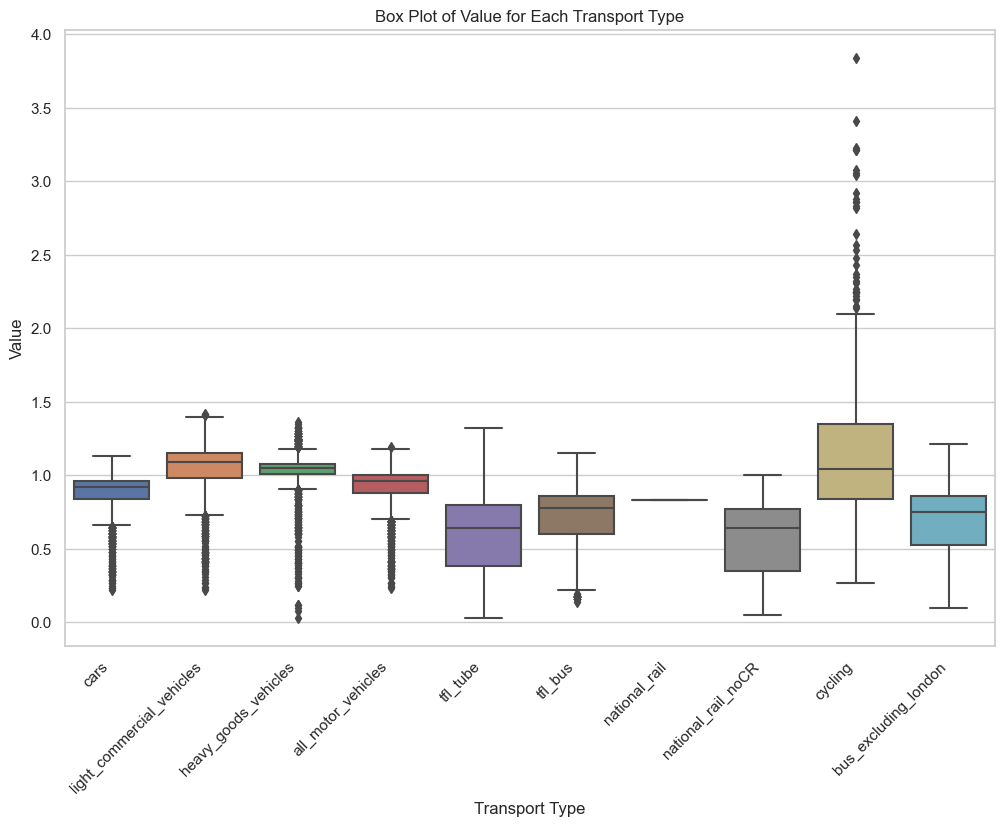

In [107]:
# Set the seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plot box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='transport_type', y='value', data=en)  # Change 'en' to 'df'
plt.title('Box Plot of Value for Each Transport Type')
plt.xlabel('Transport Type')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


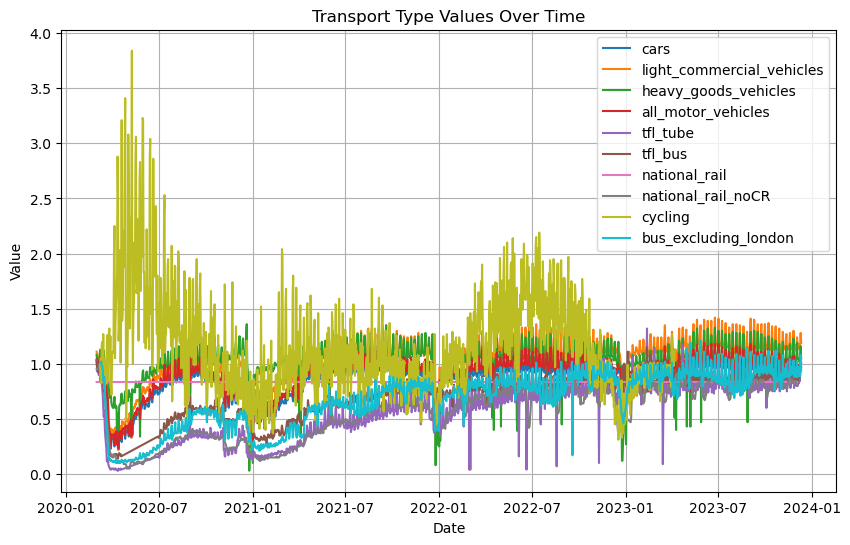

In [90]:
# Convert 'date' to datetime format
en['date'] = pd.to_datetime(en['date'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot each transport type
for transport_type in en['transport_type'].unique():
    subset = en[en['transport_type'] == transport_type]
    plt.plot(subset['date'], subset['value'], label=transport_type)

plt.title('Transport Type Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()